In [1]:
import meep as mp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
l = 20
w = 8
h = 0
cell = mp.Vector3(l,w,h)

In [3]:
geometry = [mp.Block(mp.Vector3(20,1,mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=12))
            ,mp.Cylinder(radius=1.5,material=mp.Medium(epsilon=12))
           ]
sources = [mp.Source(mp.ContinuousSource(frequency=0.15),
                     component=mp.Ez,
                     center=mp.Vector3(-6.25,0))]

In [4]:
pml_layers = [mp.PML(1.0)]
resolution = 20
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

     block, center = (0,0,0)
          size (20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (0,0,0)
          radius 1.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)


/home/mark/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/mark/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


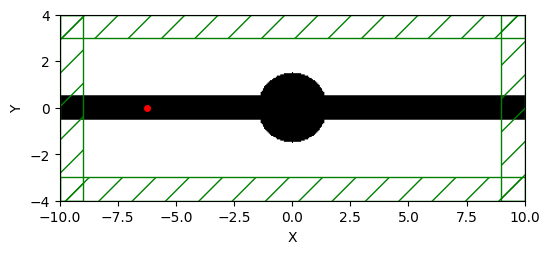

In [5]:
from matplotlib import pyplot as plt
#%matplotlib inline
#%matplotlib widget
plt.figure(dpi=100)
sim.plot2D()
plt.show()

In [6]:
sim.run(until=100)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000610113 s
Working in 2D dimensions.
Computational cell is 20 x 8 x 0 with resolution 20
     block, center = (0,0,0)
          size (20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (0,0,0)
          radius 1.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0993459 s
-----------


FloatProgress(value=0.0, description='0% done ')

run 0 finished at t = 100.0 (4000 timesteps)


     block, center = (0,0,0)
          size (20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (0,0,0)
          radius 1.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)


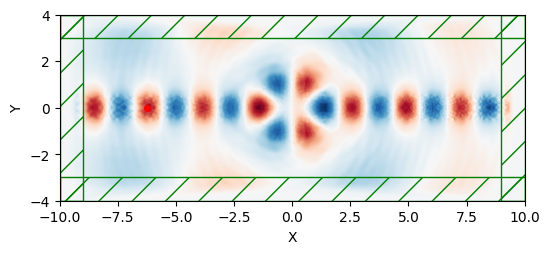

In [7]:
plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [8]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

colors = ["darkslateblue","blue", "black", "red","yellow"]
nodes = [0.0,0.1, 0.5, 0.8,1.0]
mycmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
def modu_f(fd):
    output = np.sign(fd) * np.abs(fd) ** 0.7
    return output
sim.reset_meep()
f = plt.figure(dpi=100)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True
                      ,field_parameters={'post_process':modu_f,'alpha':1, 'cmap':mycmap}
                       ,source_parameters={'alpha':1,'color':'white','linewidth':0.5,'hatch':''})
plt.close()
sim.run(mp.at_every(0.2,Animate),until=50)
plt.close()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000175953 s
Working in 2D dimensions.
Computational cell is 20 x 8 x 0 with resolution 20
     block, center = (0,0,0)
          size (20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (0,0,0)
          radius 1.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.100056 s
-----------


FloatProgress(value=0.0, description='0% done ', max=50.0)

     block, center = (0,0,0)
          size (20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (0,0,0)
          radius 1.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
Normalizing field data...
run 1 finished at t = 50.0 (2000 timesteps)


In [9]:
filename = "straight_circle_waveguide.mp4"
Animate.to_mp4(10,filename)
from IPython.display import Video
Video(filename)

Generating MP4...
